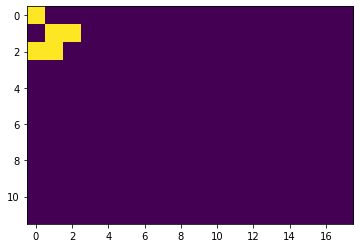

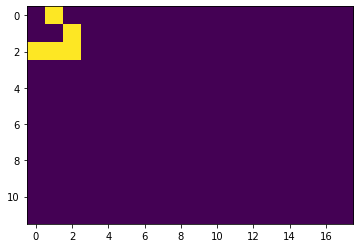

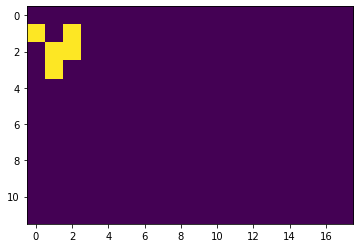

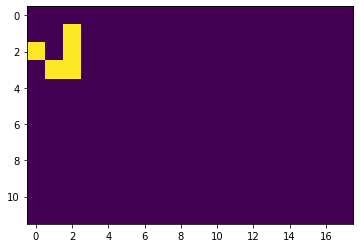

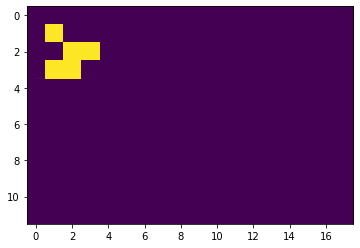

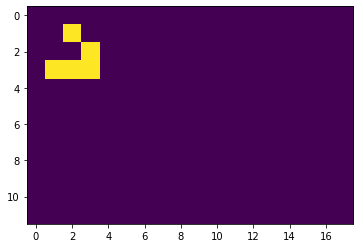

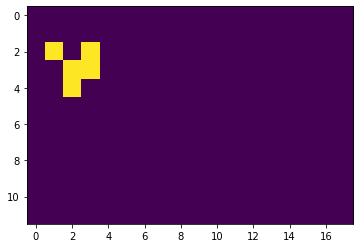

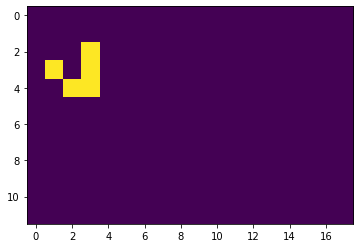

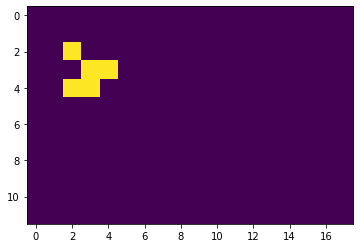

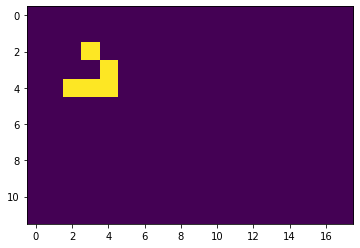

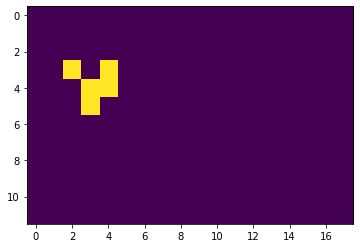

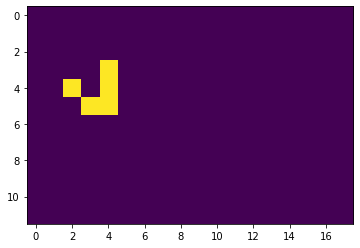

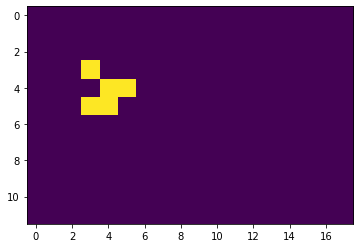

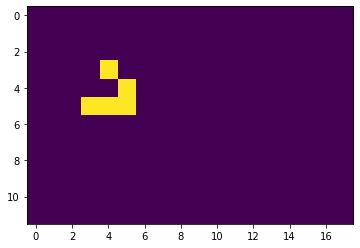

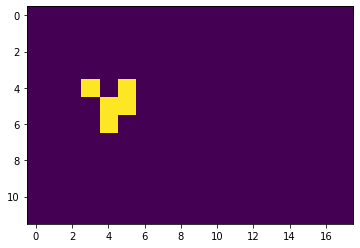

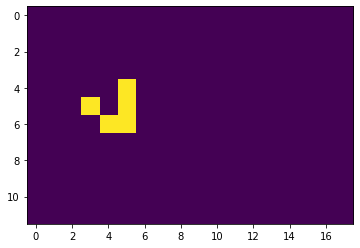

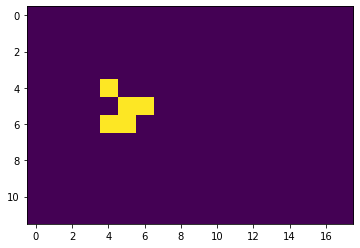

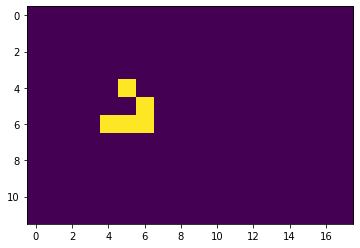

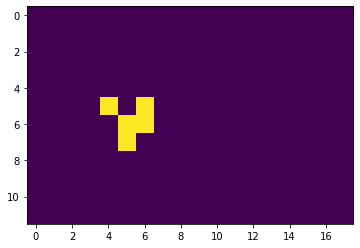

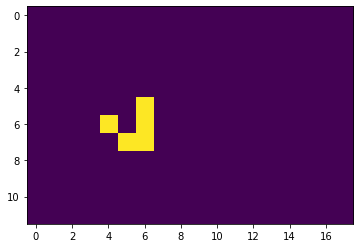

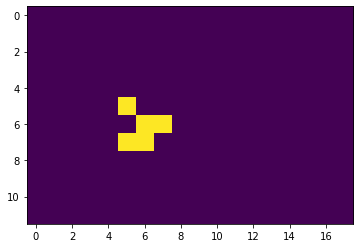

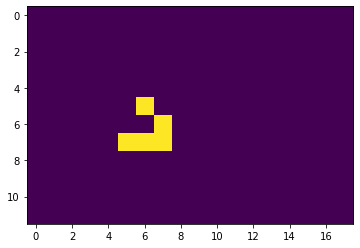

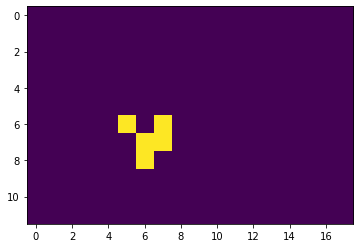

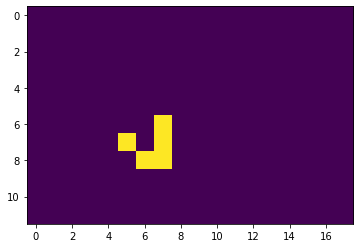

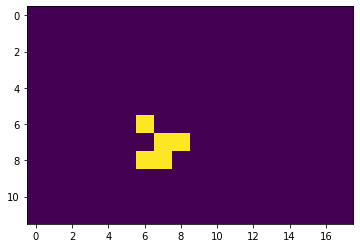

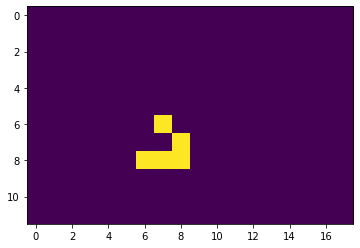

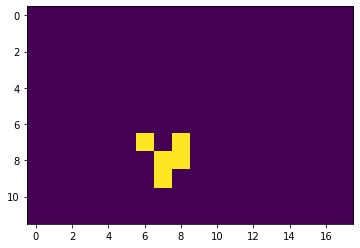

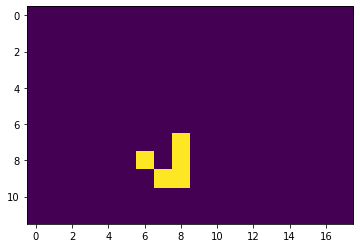

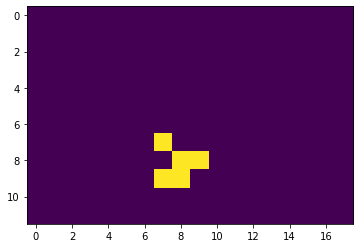

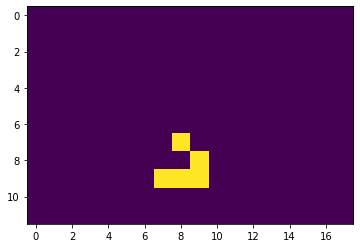

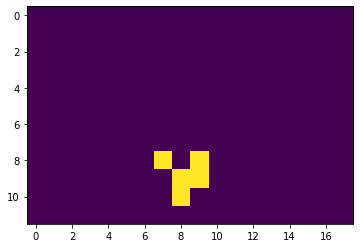

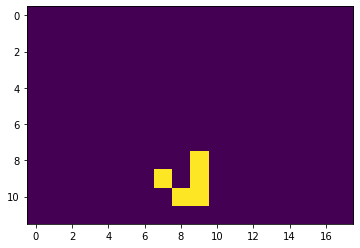

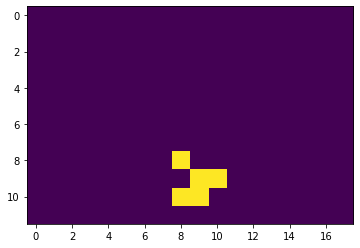

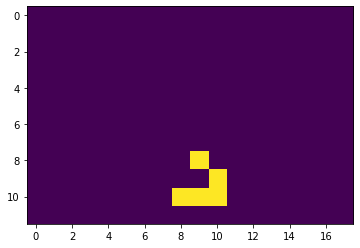

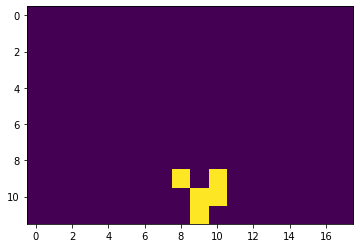

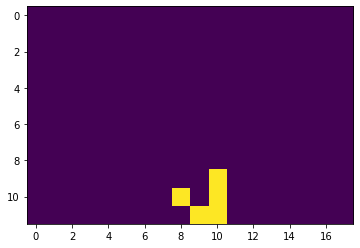

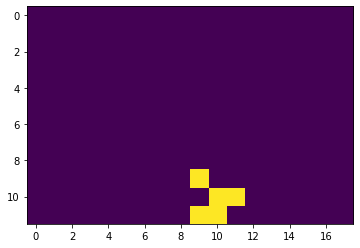

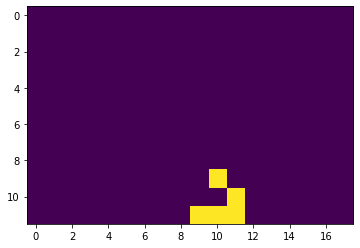

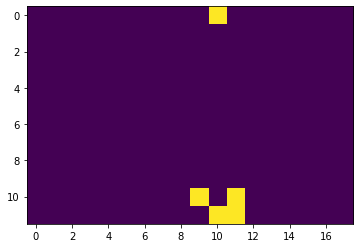

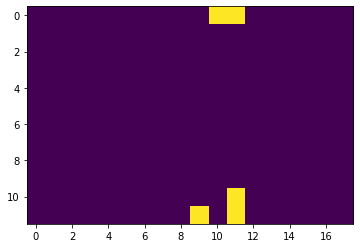

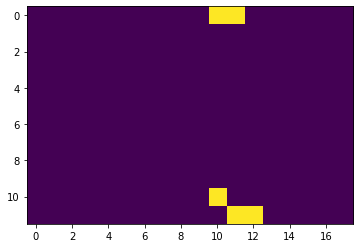

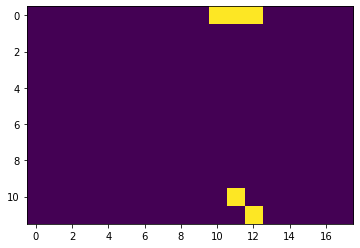

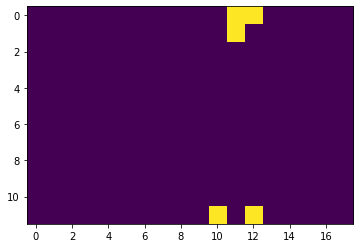

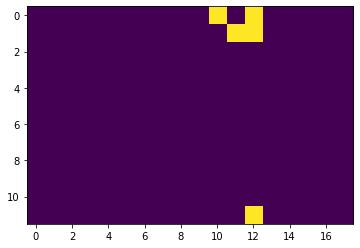

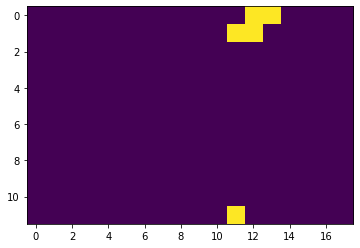

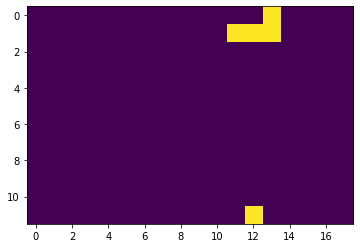

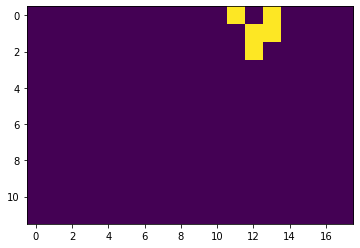

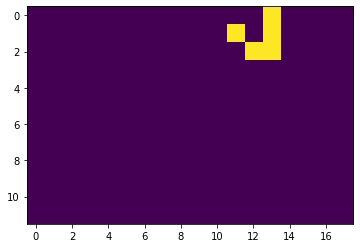

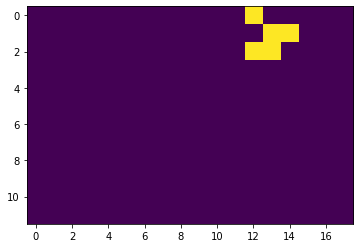

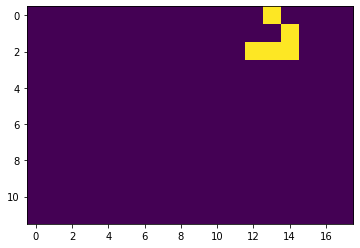

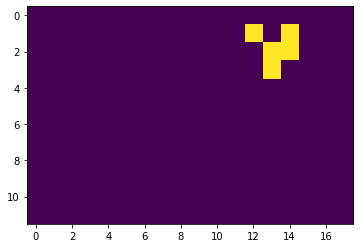

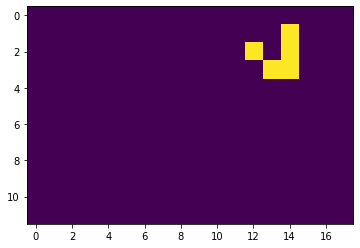

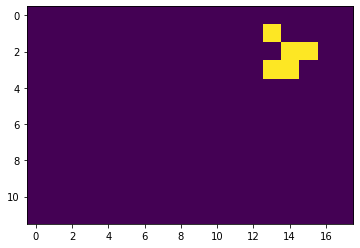

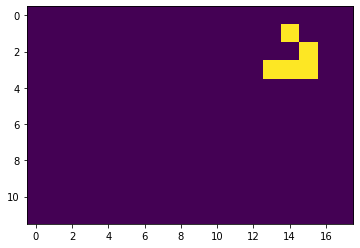

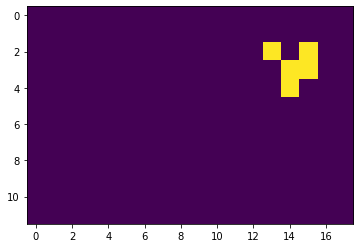

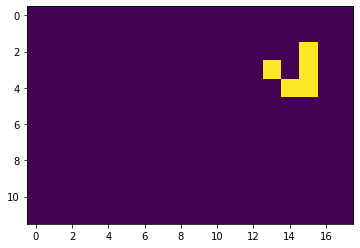

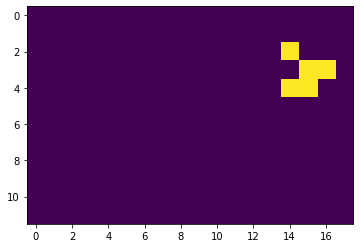

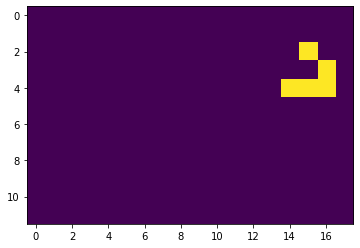

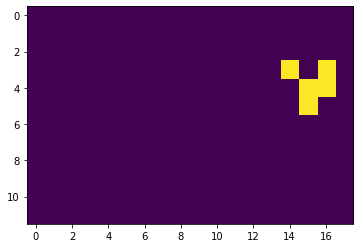

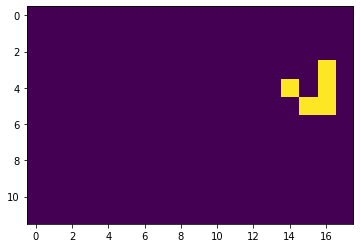

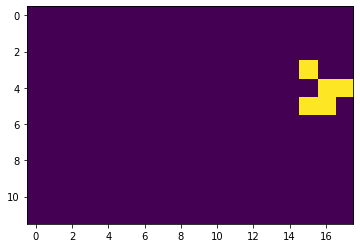

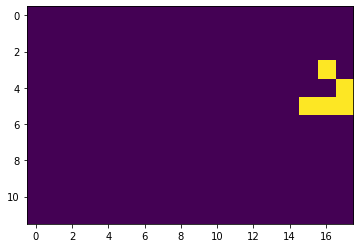

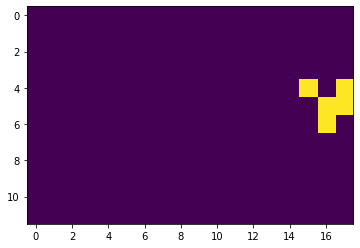

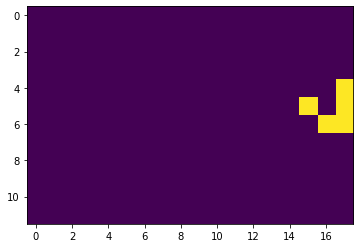

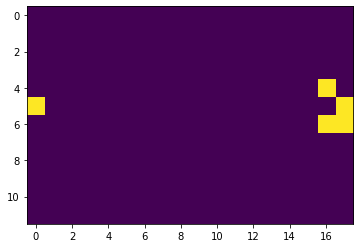

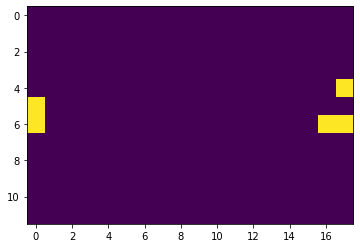

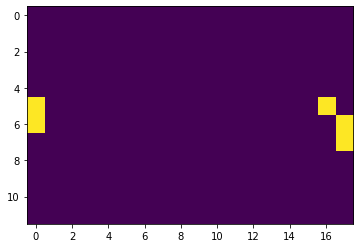

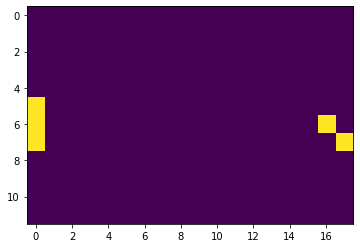

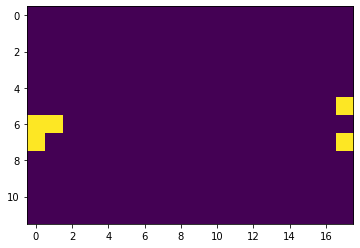

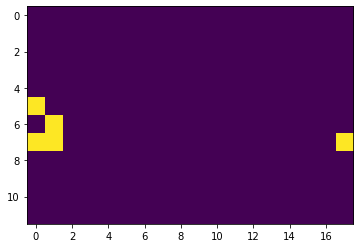

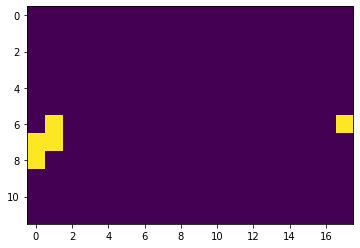

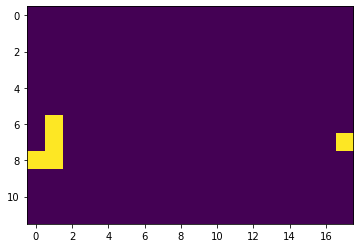

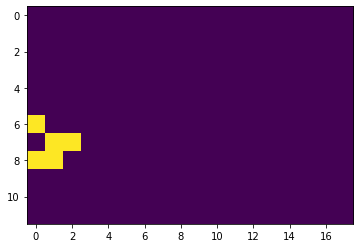

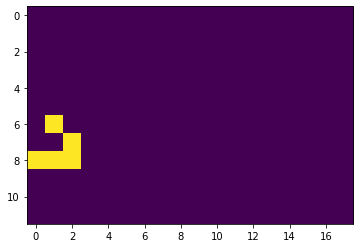

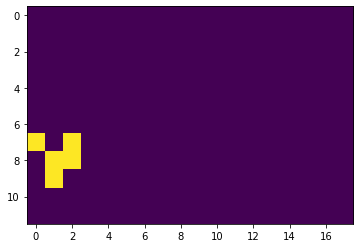

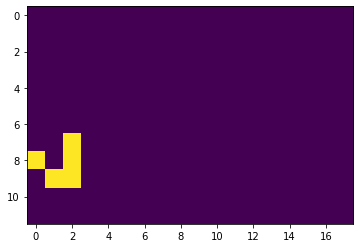

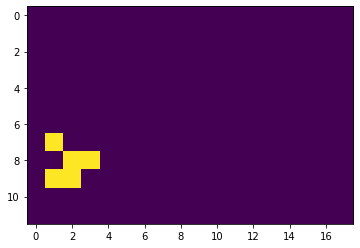

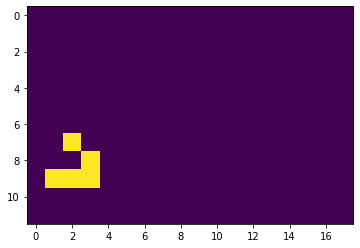

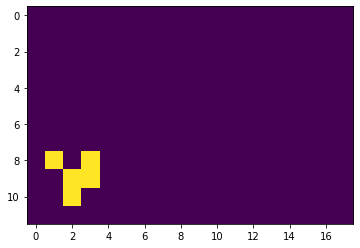

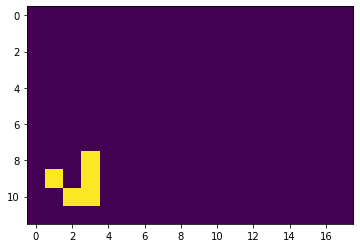

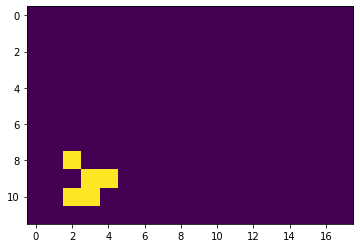

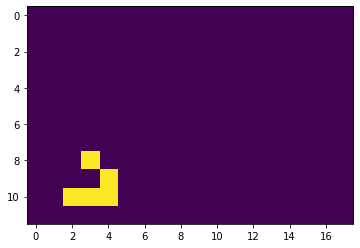

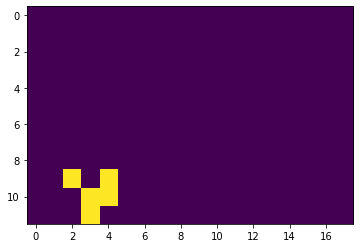

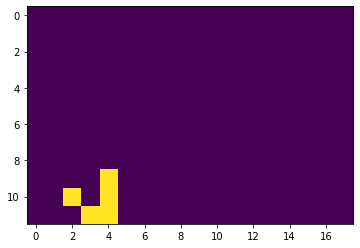

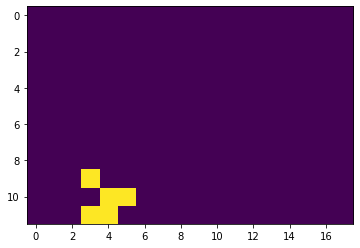

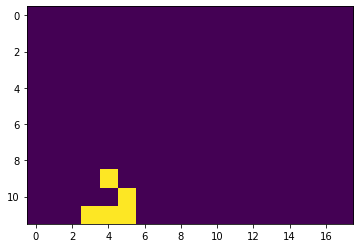

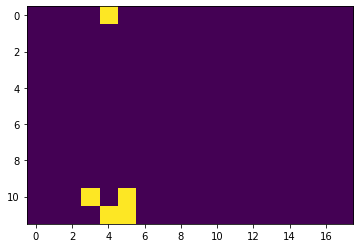

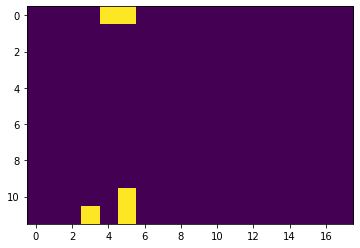

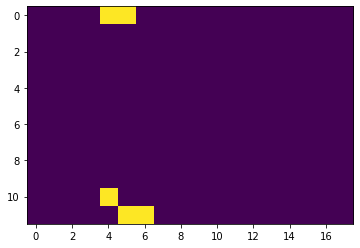

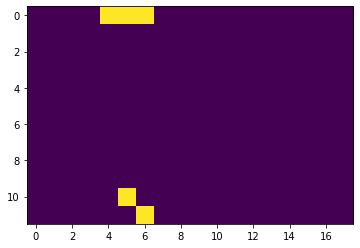

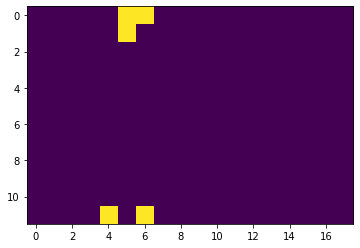

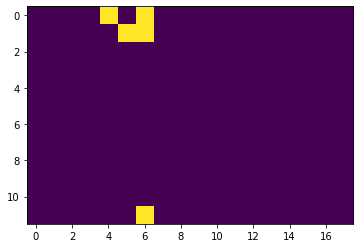

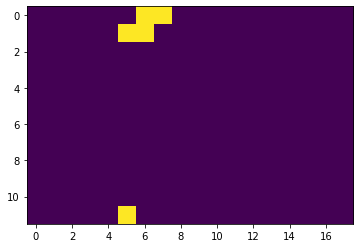

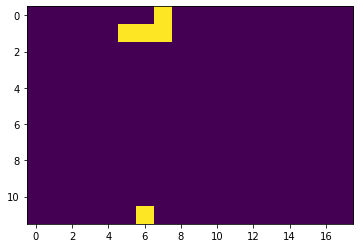

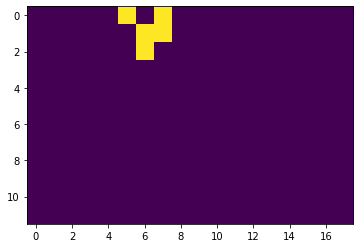

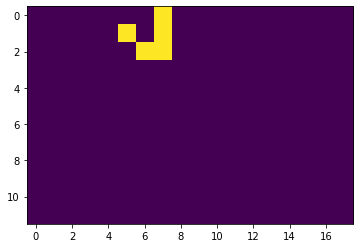

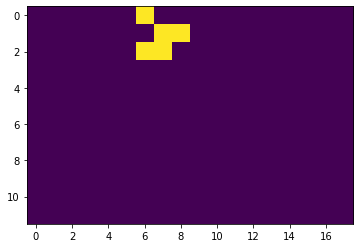

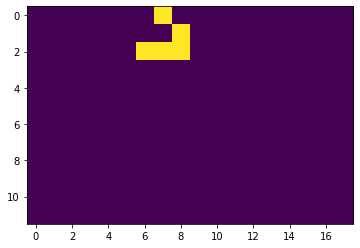

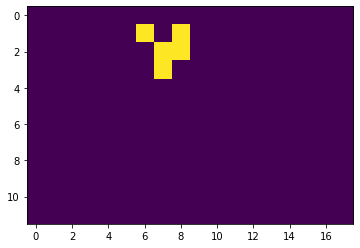

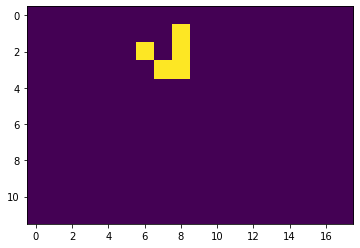

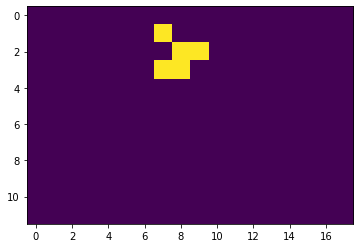

In [2]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# This contains the dimensions of each subgrid given to a node
subgrid = np.loadtxt("subgrid.txt", dtype = 'i'  , delimiter = ",")

# This contains the height, width and number of iterations of 
# our complete Game of Life
grid = np.loadtxt("grid.txt", dtype = 'i'  , delimiter = ",")

rows = grid[0]
cols = grid[1]
p = grid[2]
num_iter = grid[3]

# This is the same routine used in Setup_Life_Grid in main.cpp
# work out the closest square to p
for n in range(1, int(math.sqrt(p))+1):
    if (p % n == 0):
        domain_rows = n

domain_cols = int(p/domain_rows)
    
domain = np.ones((rows, cols))

imgs = []
# We loop to store the image of each Game of Life iteration in imgs
for n in range(0,num_iter+1):
    #plt.figure(figsize=(10,10))        
    for i in range(p): 
        file = "subgrid_" + str(i) + "_" + str(n) + ".txt"
        input = np.loadtxt(file, dtype = 'i', delimiter = ',')
        sub_rows = subgrid[0,i]
        sub_cols = subgrid[1,i]
        j = int(i/domain_cols)*sub_rows
        j = 0 
        for z in range( int(i/domain_cols) ):
            j += subgrid[0, int(i/domain_rows)*z + domain_cols]
        k = 0
        for z in range(i % domain_cols):
            k += subgrid[1, int(i/domain_cols)*domain_cols + z]
        domain[j:j+sub_rows, k:k+sub_cols] = input
        #domain = input  
    img = plt.imshow(domain, animated=True)
    plt.show()
    imgs.append([img])